Multivariate analysis complete. Visualizations have been saved as PNG files.


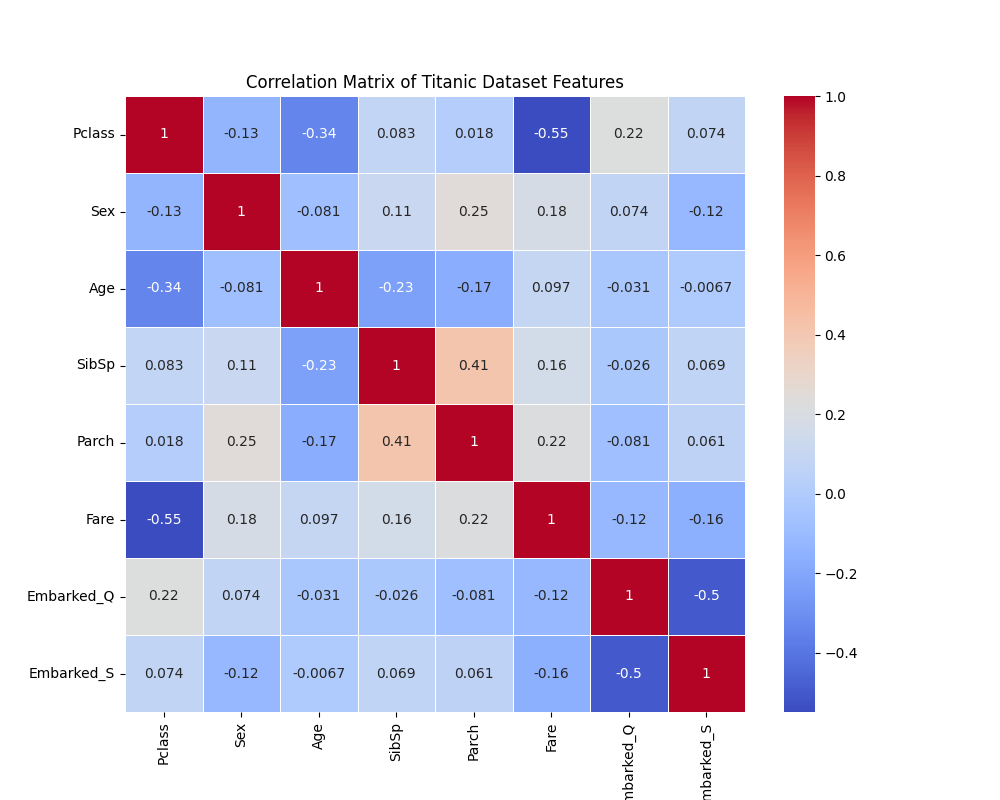

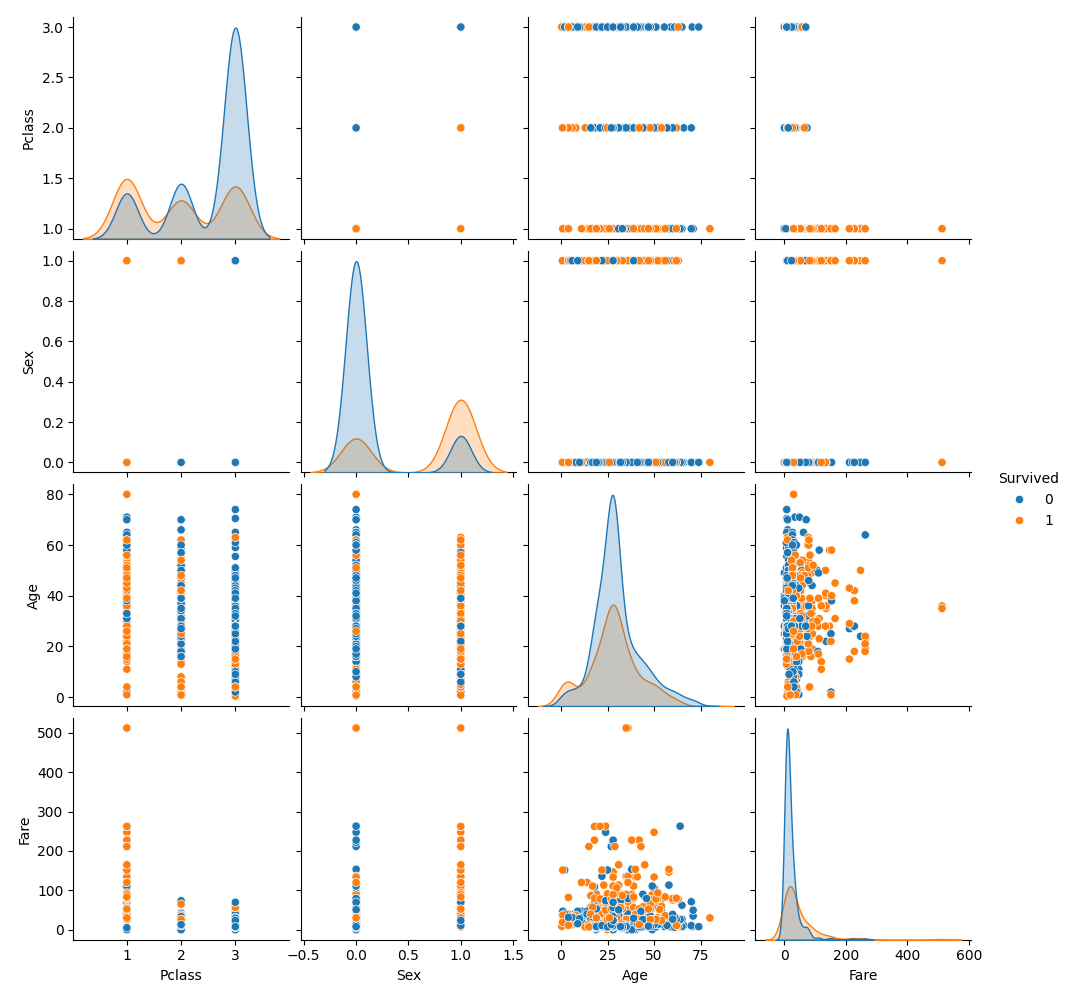

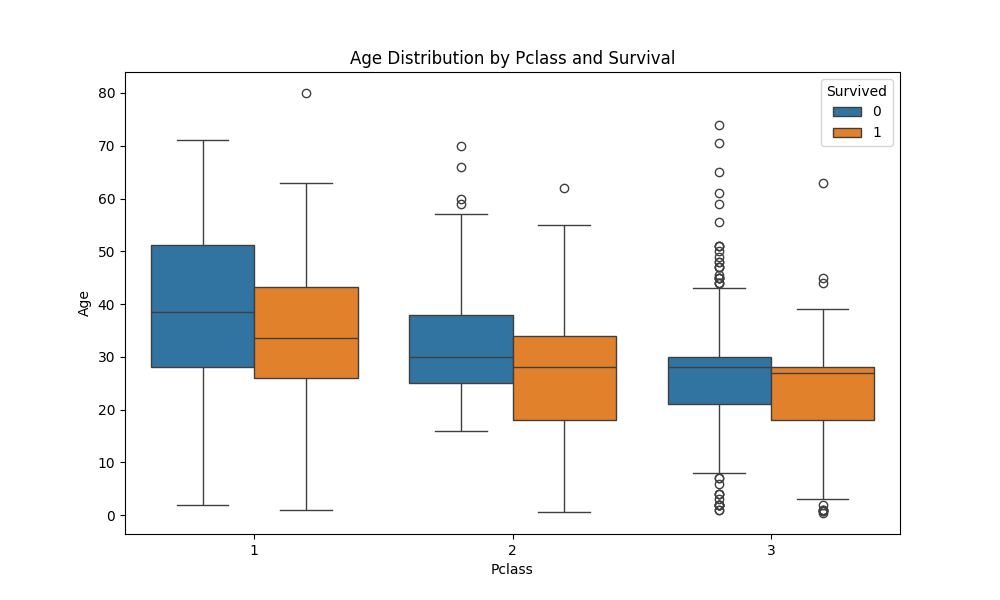

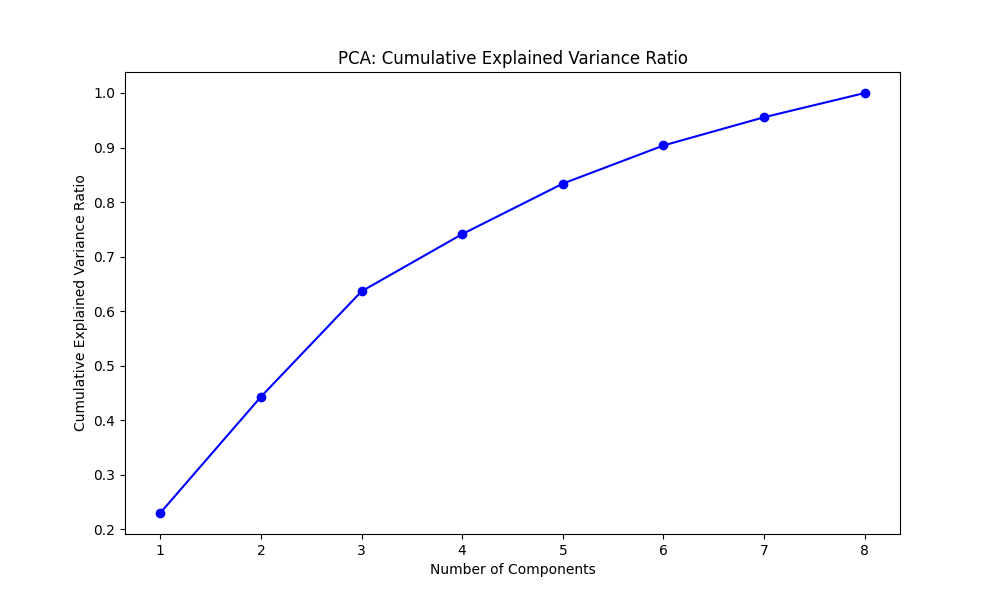

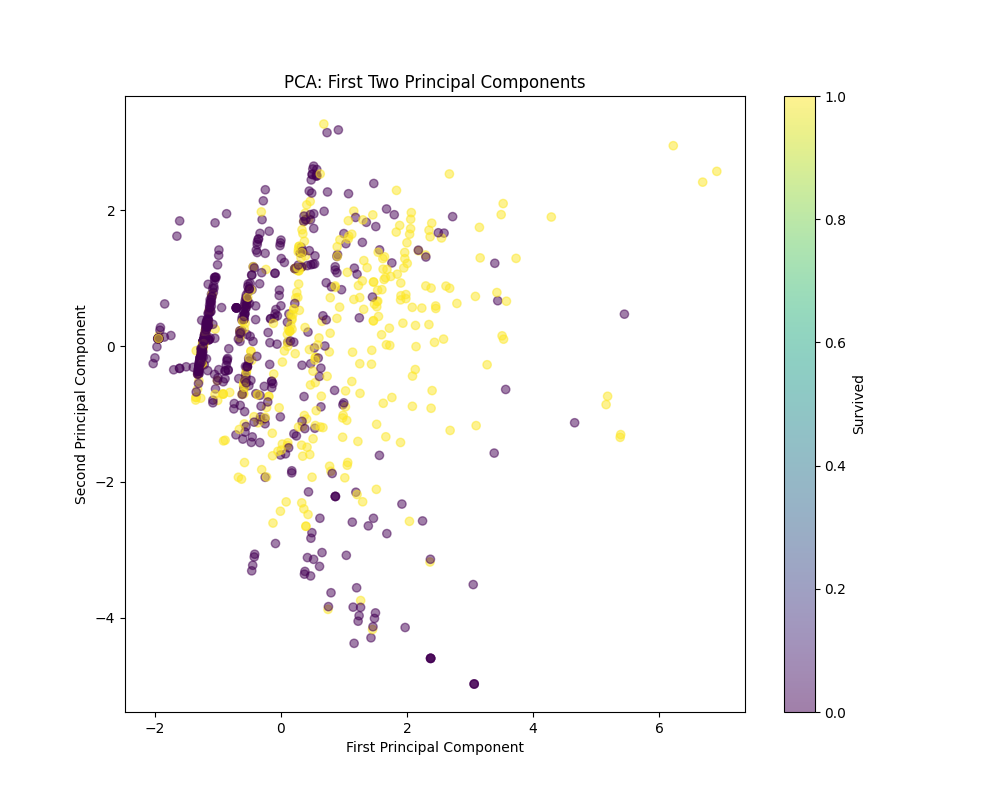

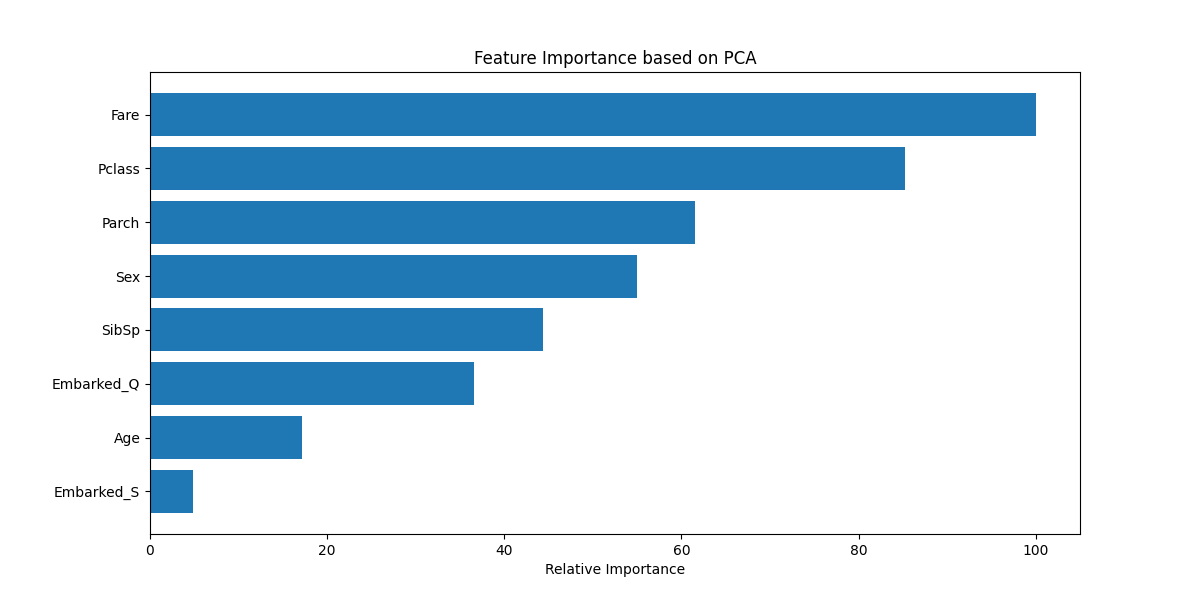

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

df = pd.read_csv('titanic.csv')

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features]

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.savefig('titanic_correlation_matrix.png')
plt.close()

sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived', diag_kind='kde')
plt.savefig('titanic_pair_plot.png')
plt.close()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Age Distribution by Pclass and Survival')
plt.savefig('titanic_age_pclass_survival_boxplot.png')
plt.close()

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio')
plt.savefig('titanic_pca_variance_ratio.png')
plt.close()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Survived'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Survived')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.savefig('titanic_pca_scatter.png')
plt.close()
feature_importance = abs(pca.components_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(features)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance based on PCA')
plt.savefig('titanic_feature_importance.png')
plt.close()
print("Multivariate analysis complete. Visualizations have been saved as PNG files.")

from IPython.display import Image, display
display(Image('titanic_correlation_matrix.png'))
display(Image('titanic_pair_plot.png'))
display(Image('titanic_age_pclass_survival_boxplot.png'))
display(Image('titanic_pca_variance_ratio.png'))
display(Image('titanic_pca_scatter.png'))
display(Image('titanic_feature_importance.png'))